In [1]:
import random
import matplotlib.pyplot as plt

In [2]:
def generate_message():
    return "".join([str(random.randint(0, 1)) for _ in range(4)])


message = generate_message()
print("Generated Message:", message)

Generated Message: 0000


In [3]:
def hamming_74_encode(data):
    # Перевірка, чи передано вірну кількість бітів
    if len(data) != 4:
        raise ValueError("Input data must be 4 bits long")

    # Кодування Геммінга (7,4)
    encoded = ""

    # Визначення бітів перевірки парності
    p1 = str(int(data[0]) ^ int(data[1]) ^ int(data[3]))
    p2 = str(int(data[0]) ^ int(data[2]) ^ int(data[3]))
    p4 = str(int(data[1]) ^ int(data[2]) ^ int(data[3]))

    # Формування закодованого слова
    encoded += p1
    encoded += p2
    encoded += data[0]
    encoded += p4
    encoded += data[1]
    encoded += data[2]
    encoded += data[3]

    return encoded

encoded_message = hamming_74_encode(message)
print("Original Data:", message)
print("Encoded Message:", encoded_message)


Original Data: 0000
Encoded Message: 0000000


In [6]:
# def hamming_encode(data):
#     r = 0
#     while 2**r < len(data) + r + 1:
#         r += 1

#     encoded = ""
#     j = 0
#     for i in range(len(data) + r):
#         if i + 1 not in [2**k for k in range(r)]:
#             encoded += data[j]
#             j += 1
#         else:
#             encoded += "0" 

#     for i in range(r):
#         parity_pos = 2**i
#         ones_count = 0
#         for j in range(1, len(encoded) + 1):
#             if j & parity_pos == parity_pos and encoded[j - 1] == "1":
#                 ones_count += 1
#         encoded = encoded[: parity_pos - 1] + str(ones_count % 2) + encoded[parity_pos:]

#     return encoded


# encoded_message = hamming_encode(message)
# print("Original Message:", message)
# print("Encoded Message:", encoded_message)

Original Message: 1110
Encoded Message: 0010110


In [4]:
def errors(encoded_message, prob_of_error):
    new_message = ""
    for i in range(7):
        if random.random() < prob_of_error:
            if encoded_message[i] == "0":
                new_message += "1"
            else:
                new_message += "0"
        else:
            new_message += encoded_message[i]
    return new_message


message_with_errors = errors(encoded_message, 0.2)
print("Generated Messages:", message)
print("Encoded Message:", encoded_message)
print("Message with errors:", message_with_errors)

Generated Messages: 0000
Encoded Message: 0000000
Message with errors: 0000000


In [5]:
def hamming_74_decode(encoded):
    # Перевірка, чи передано вірну кількість бітів
    if len(encoded) != 7:
        raise ValueError("Encoded data must be 7 bits long")

    # Розрахунок бітів перевірки парності
    p1 = int(encoded[0]) ^ int(encoded[2]) ^ int(encoded[4]) ^ int(encoded[6])
    p2 = int(encoded[1]) ^ int(encoded[2]) ^ int(encoded[5]) ^ int(encoded[6])
    p4 = int(encoded[3]) ^ int(encoded[4]) ^ int(encoded[5]) ^ int(encoded[6])

    # Визначення позиції помилки
    error_pos = p1 * 1 + p2 * 2 + p4 * 4

    # Корекція помилки
    if error_pos != 0:
        # print("Error detected at position:", error_pos)
        corrected_bit = '1' if encoded[error_pos - 1] == '0' else '0'
        corrected_encoded = encoded[:error_pos - 1] + corrected_bit + encoded[error_pos:]
        # print("Corrected Encoded Message:", corrected_encoded)
        encoded = corrected_encoded

    # Вилучення бітів перевірки парності
    decoded = encoded[2] + encoded[4] + encoded[5] + encoded[6]

    return decoded

# Приклад використання

decoded_data = hamming_74_decode(encoded_message)
print("Encoded Message:", encoded_message)
print("Decoded Data:", decoded_data)


Encoded Message: 0000000
Decoded Data: 0000


In [6]:
# def hamming_decode(codeword):
#     r = 0
#     while 2**r < len(codeword):
#         r += 1

#     syndromes = []
#     for i in range(r):
#         parity_pos = 2**i
#         ones_count = 0
#         for j in range(1, len(codeword) + 1):
#             if j & parity_pos == parity_pos and codeword[j - 1] == "1":
#                 ones_count += 1
#         syndromes.append(ones_count % 2)

#     error_bit = sum([2**i * s for i, s in enumerate(syndromes)])

#     if error_bit > 0:
#         corrected_bit = "0" if codeword[error_bit - 1] == "1" else "1"
#         codeword = codeword[: error_bit - 1] + corrected_bit + codeword[error_bit:]

#     decoded = ""
#     j = 0
#     for i in range(len(codeword)):
#         if i + 1 not in [2**k for k in range(r)]:
#             decoded += codeword[i]
#             j += 1

#     return decoded


# decoded_message = hamming_decode(message_with_errors)
# print("Original message:", message)
# print("Encoded message:", encoded_message)
# print("Error message", message_with_errors)
# print("Decoded message:", decoded_message)

In [7]:
list_of_messages_1000 = [generate_message() for _ in range(1000)]
list_of_messages_10000 = [generate_message() for _ in range(10000)]
list_of_messages_100000 = [generate_message() for _ in range(100000)]


list_of_messages_encoded_1000 = [
    hamming_74_encode(message) for message in list_of_messages_1000
]
list_of_messages_encoded_10000 = [
    hamming_74_encode(message) for message in list_of_messages_10000
]
list_of_messages_encoded_100000 = [
    hamming_74_encode(message) for message in list_of_messages_100000
]

error_prob = 0.3

list_of_messages_with_errors_1000 = [
    errors(message, error_prob) for message in list_of_messages_encoded_1000
]
list_of_messages_with_errors_10000 = [
    errors(message, error_prob) for message in list_of_messages_encoded_10000
]
list_of_messages_with_errors_100000 = [
    errors(message, error_prob) for message in list_of_messages_encoded_100000
]


list_of_messages_decode_1000 = [
    hamming_74_decode(message) for message in list_of_messages_with_errors_1000
]
list_of_messages_decode_10000 = [
    hamming_74_decode(message) for message in list_of_messages_with_errors_10000
]
list_of_messages_decode_100000 = [
    hamming_74_decode(message) for message in list_of_messages_with_errors_100000
]

print("Generated Messages:", list_of_messages_1000[:10])
print("Generated encoded Messages:", list_of_messages_encoded_1000[:10])
print("Generated Messages with errors:", list_of_messages_with_errors_1000[:10])
print("Generated decoded Messages:", list_of_messages_decode_1000[:10])
print("_________________________________________________________________")

print("Generated Messages:", list_of_messages_10000[:10])
print("Generated encoded Messages:", list_of_messages_encoded_10000[:10])
print("Generated Messages with errors:", list_of_messages_with_errors_10000[:10])
print("Generated decoded Messages:", list_of_messages_decode_10000[:10])
print("_________________________________________________________________")

print("Generated Messages:", list_of_messages_100000[:10])
print("Generated encoded Messages:", list_of_messages_encoded_100000[:10])
print("Generated Messages with errors:", list_of_messages_with_errors_100000[:10])
print("Generated decoded Messages:", list_of_messages_decode_100000[:10])
print("_________________________________________________________________")

Generated Messages: ['1110', '0000', '0001', '0101', '0001', '0001', '1000', '0001', '0000', '0000']
Generated encoded Messages: ['0010110', '0000000', '1101001', '0100101', '1101001', '1101001', '1110000', '1101001', '0000000', '0000000']
Generated Messages with errors: ['0001101', '0000010', '1111000', '1100101', '1101001', '1101010', '1100000', '1110111', '1101010', '0110101']
Generated decoded Messages: ['0111', '0000', '1000', '0101', '0001', '0010', '1000', '1111', '0010', '0101']
_________________________________________________________________
Generated Messages: ['0111', '1111', '0010', '0110', '0110', '0110', '0111', '0010', '1100', '1111']
Generated encoded Messages: ['0001111', '1111111', '0101010', '1100110', '1100110', '1100110', '0001111', '0101010', '0111100', '1111111']
Generated Messages with errors: ['0001000', '1011111', '0011011', '1101110', '0101010', '1100010', '0101111', '1011000', '1111100', '0001111']
Generated decoded Messages: ['0000', '1111', '1001', '0110'

In [8]:
def check_equality(original_message, new_message):
    for i in range(4):
        if original_message[i] != new_message[i]:
            return False
    return True

print(check_equality(list_of_messages_100000[2], list_of_messages_decode_100000[2]))

True


In [9]:
def calculate_accuracy(original_messages, decoded_messages):
    correct_count = sum([1 for original, decoded in zip(original_messages, decoded_messages) if original == decoded])
    total_count = len(original_messages)
    accuracy = correct_count / total_count
    return accuracy

In [10]:
def calculate_accuracy_for_error_rates(
    error_rates,
    list_of_messages,
    hamming_encode,
    errors,
    hamming_decode,
    calculate_accuracy,
):
    accuracies = []
    for error_rate in error_rates:
        encoded_messages = [hamming_encode(message) for message in list_of_messages]
        messages_with_errors = [
            errors(encoded_message, error_rate) for encoded_message in encoded_messages
        ]
        decoded_messages = [hamming_decode(message) for message in messages_with_errors]
        accuracy = calculate_accuracy(list_of_messages, decoded_messages)
        accuracies.append(accuracy)
    return accuracies


error_rates = [0.1, 0.2, 0.3, 0.4]
accuracies = calculate_accuracy_for_error_rates(
    error_rates,
    list_of_messages_1000,
    hamming_74_encode,
    errors,
    hamming_74_decode,
    calculate_accuracy,
)
print(accuracies)

[0.836, 0.58, 0.323, 0.155]


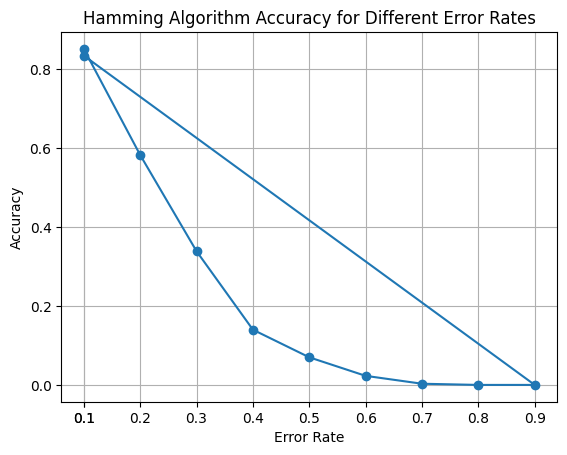

In [13]:
error_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.10]

accuracies_10000 = calculate_accuracy_for_error_rates(
    error_rates,
    list_of_messages_10000,
    hamming_74_encode,
    errors,
    hamming_74_decode,
    calculate_accuracy,
)
plt.plot(error_rates, accuracies_10000, marker="o")
plt.title("Hamming Algorithm Accuracy for Different Error Rates")
plt.xlabel("Error Rate")
plt.ylabel("Accuracy")
plt.grid(True)
plt.xticks(error_rates)
plt.show()


In [11]:

def count_correct_decodes(messages, decoded_messages):
    correct_count = sum(1 for m, d in zip(messages, decoded_messages) if m == d)
    return correct_count / len(messages) * 100



In [12]:
def count_errors(original_messages, decoded_messages):
    corrected_errors = [0] * 5
    for i in range(len(original_messages)):
        number_of_errors = 0
        for j in range(len(original_messages[i])):
            if original_messages[i][j] != decoded_messages[i][j]:
                number_of_errors += 1
        corrected_errors[number_of_errors] += 1
    return corrected_errors

# print(list_of_messages_100000, list_of_messages_decode_10000)
print(
    count_errors(list_of_messages_10000, list_of_messages_decode_10000)
)

[3333, 2254, 2818, 1567, 28]


In [13]:
def check_equality(original_message_list, new_message_list):
    corrected_errors = [0] * 5
    for i in range(len(original_message_list)):
        counter_of_errors = 0
        for j in range(len(original_message_list[i])):
            if (
                j not in [0, 1, 3]
                and original_message_list[i][j] != new_message_list[i][j]
            ):
                counter_of_errors += 1
        corrected_errors[counter_of_errors] += 1
    return corrected_errors

print(
    check_equality(list_of_messages_encoded_10000, list_of_messages_with_errors_10000)
)

[2449, 4151, 2580, 744, 76]


[3333, 2254, 2818, 1567, 28]


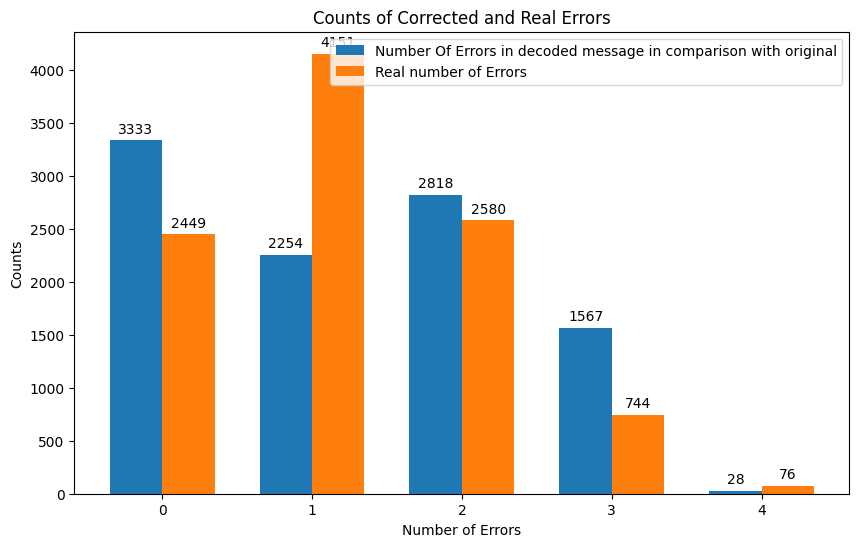

In [14]:
import numpy as np
import matplotlib.pyplot as plt

errors_count = list(range(8))
corrected_counts = []


corrected_counts = count_errors(list_of_messages_10000, list_of_messages_decode_10000)
print(corrected_counts)

real_number_of_errors = check_equality(
    list_of_messages_encoded_10000, list_of_messages_with_errors_10000
)

x = np.arange(len(corrected_counts))

width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(
    x - width / 2,
    corrected_counts,
    width,
    label="Number Of Errors in decoded message in comparison with original",
)
rects2 = ax.bar(
    x + width / 2, real_number_of_errors, width, label="Real number of Errors"
)

ax.set_xlabel("Number of Errors")
ax.set_ylabel("Counts")
ax.set_title("Counts of Corrected and Real Errors")
ax.set_xticks(x)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(
            "{}".format(height),
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(0, 3),
            textcoords="offset points",
            ha="center",
            va="bottom",
        )

autolabel(rects1)
autolabel(rects2)

plt.show()